# PASSIVE AGRESSIVE CLASSIFIER

In [1]:
!pip install mkl
from sklearnex import patch_sklearn
patch_sklearn()
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
!pip install pandas
!pip install numpy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as cf_matrix

In [4]:
df=pd.read_csv('/kaggle/input/water-quality-prediction/dataset.csv')


# PREPROCESSING

In [5]:
# Define the list of numerical and categorical columns
categorical_cols= ['Color', 'Source', 'Month']
numerical_cols  = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids',
       'Water Temperature', 'Air Temperature', 'Day', 'Time of Day',
       'Target']
# Separate numerical and categorical variables
numerical_data = df[numerical_cols]
categorical_data = df[categorical_cols]

In [6]:
def convert_categorical_to_numeric(df, categorical_cols):
    le = LabelEncoder()
    for col in categorical_cols:
        if col in df.columns:
            df[col] = le.fit_transform(df[col])
    return df

df_encoded = convert_categorical_to_numeric(df, categorical_cols)

# Print the encoded values of the categorical columns
for col in categorical_cols:
    print(col, df_encoded[col].unique())
def replace_invalid_values_with_mean(df, numerical_cols):
    for col in numerical_cols:
        if df[col].dtype != np.number:
            continue
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)
    return df

Color [0 1 2 3 4 5]
Source [8 2 4 1 5 6 0 3 7]
Month [ 4  9  0  6  7 11  8  5  1 10  2  3 12]


In [13]:
df.dropna(inplace=True)

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Passive Aggressive Classifier

In [15]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa_classifier=PassiveAggressiveClassifier()
pa_classifier.fit(X_train_scaled,y_train)

PassiveAggressiveClassifier()

In [16]:
y_pred=pa_classifier.predict(X_test_scaled) 
accuracy_score(y_test,y_pred)

0.7321169933710566

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81   1146056
           1       0.57      0.49      0.53    498550

    accuracy                           0.73   1644606
   macro avg       0.68      0.66      0.67   1644606
weighted avg       0.72      0.73      0.73   1644606



In [18]:
cf_matrix(y_test, y_pred)

array([[958302, 187754],
       [252808, 245742]])

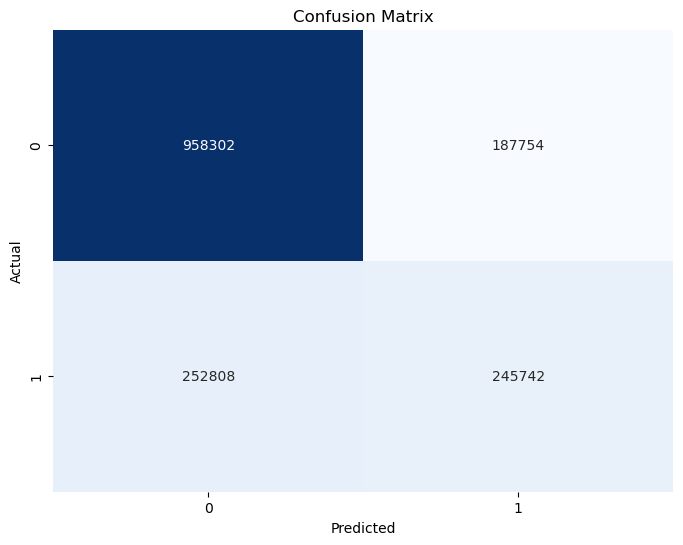

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


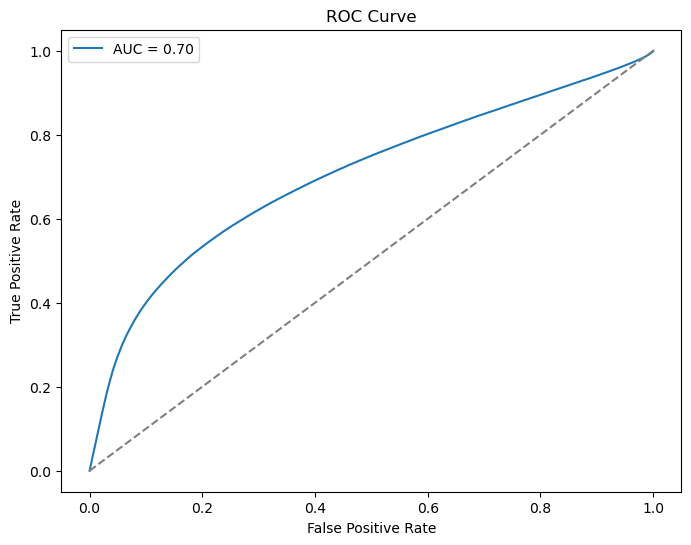

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

# Decision function returns the signed distance of samples to the separating hyperplane.
y_scores = pa_classifier.decision_function(X_test_scaled)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


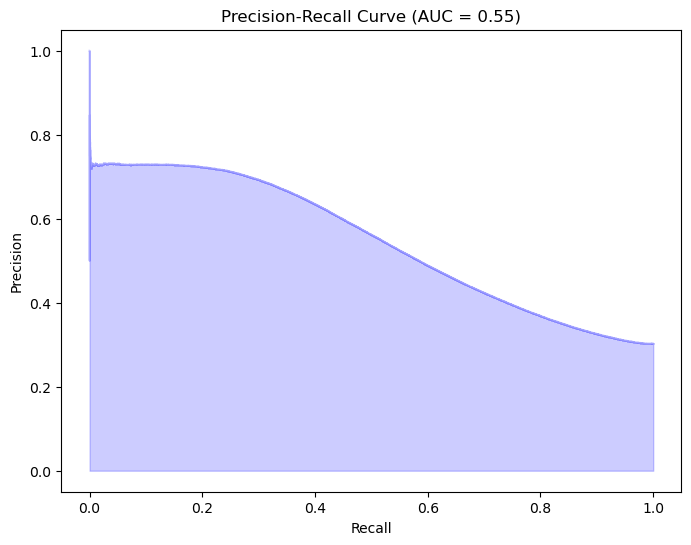

In [21]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Decision function returns the signed distance of samples to the separating hyperplane.
y_scores = pa_classifier.decision_function(X_test_scaled)

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AUC = {:.2f})'.format(average_precision))
plt.show()



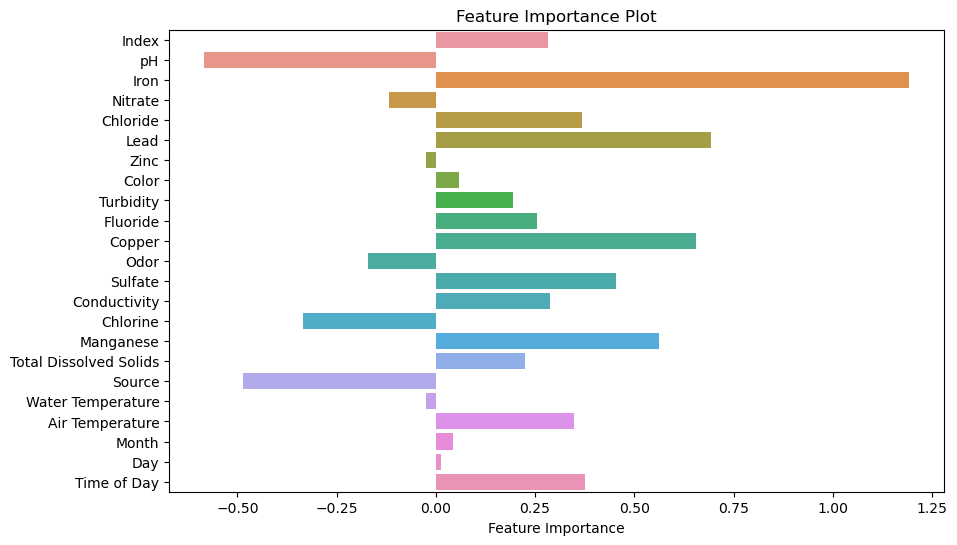

In [22]:
if hasattr(pa_classifier, 'coef_'):
    # Visualize feature importances (for classifiers that support it)
    feature_importances = pa_classifier.coef_
    feature_names = X_train.columns  # Replace with your feature names
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances[0], y=feature_names)
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance Plot')
    plt.show()
